In [1]:
#teste da biblioteca mplfinance e graficos candlestick junto com médias moveis
#Backtest com cruzamento de médias moveis simples de 20 e 8 periodos na ponta de compra

In [2]:
# Instalando e importando yahooquery
import yfinance as yf
import datetime as dt
import talib as ta
from datetime import date as date
import math
import mplfinance as mpf
from mplfinance.original_flavor import candlestick_ohlc
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import iplot
from ipywidgets import interact
import seaborn as sns
    
%matplotlib inline
pyo.init_notebook_mode()
pd.options.plotting.backend = 'plotly'

In [3]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}

In [4]:
#Define ativos, datas e numero de portfolios a serem calculados
#Área de entrada de dados e manipulação pelo usuário
#[ABEV3][AZUL4][B3SA3][BBAS3][BBDC3][BBDC4][BBSE3][BEEF3][BRAP4][BRDT3][BRFS3][BRKM5][BRML3][BTOW3][CCRO3][CIEL3][CMIG4][COGN3][CPFE3]
#[CPLE6][CRFB3][CSAN3][CSNA3][CVCB3][CYRE3][ECOR3][EGIE3][ELET3][ELET6][EMBR3][ENBR3][ENEV3][EQTL3][EZTC3][FLRY3][GGBR4][GNDI3][GOAU4]
#[GOLL4][HAPV3][HGTX3][HYPE3][IGTA3][IRBR3][ITSA4][ITUB4][JBSS3][JHSF3][LAME4][LCAM3][LREN3][MGLU3][MRFG3][MRVE3][MULT3][NTCO3][PCAR3]
#[PETR3][PETR4][PRIO3][QUAL3][RADL3][RAIL3][RENT3][SBSP3][SUZB3][TIMS3][TOTS3][UGPA3][USIM5][VALE3][VIVT3][VVAR3][WEGE3][YDUQ3]
acao = 'ITSA4'
tickers = [acao + '.SA']
data_fim = date.today().strftime("%Y-%m-%d")
data_inicio = date.today() - dt.timedelta(365)
data_inicio = data_inicio.strftime("%Y-%m-%d")

In [5]:
#Datraframe com as cotações diárias
cotac_diaria = yf.download(tickers, start=data_inicio, end=data_fim, rounding=True)
cotac_seman = yf.download(tickers, period = '1y', interval='1wk', rounding=True)
cotac_seman = cotac_seman.dropna().drop(cotac_seman.tail(1).index)
cotac_mensal = yf.download(tickers, period = '5y', interval='1mo', rounding=True)
cotac_mensal = cotac_mensal.dropna().drop(cotac_mensal.tail(1).index)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
ind_adx_d = ta.ADX(cotac_diaria['High'], cotac_diaria['Low'], cotac_diaria['Close'])
ind_adxr_d = ta.ADXR(cotac_diaria['High'], cotac_diaria['Low'], cotac_diaria['Close'])
adx_d = pd.DataFrame(ind_adx_d)
adxr_d = pd.DataFrame(ind_adxr_d)
indic_d = adx_d.merge(adxr_d, left_index=True, right_index=True).dropna()
indic_d.columns = ['ADX', 'ADXR']

In [7]:
ind_adx_s = ta.ADX(cotac_seman['High'], cotac_seman['Low'], cotac_seman['Close'])
ind_adxr_s = ta.ADXR(cotac_seman['High'], cotac_seman['Low'], cotac_seman['Close'])
adx_s = pd.DataFrame(ind_adx_s)
adxr_s = pd.DataFrame(ind_adxr_s)
indic_s = adx_s.merge(adxr_s, left_index=True, right_index=True).dropna()
indic_s.columns = ['ADX', 'ADXR']

In [8]:
ind_adx_m = ta.ADX(cotac_mensal['High'], cotac_mensal['Low'], cotac_mensal['Close'])
ind_adxr_m = ta.ADXR(cotac_mensal['High'], cotac_mensal['Low'], cotac_mensal['Close'])
adx_m = pd.DataFrame(ind_adx_m)
adxr_m = pd.DataFrame(ind_adxr_m)
indic_m = adx_m.merge(adxr_m, left_index=True, right_index=True).dropna()
indic_m.columns = ['ADX', 'ADXR']

In [9]:
ind_ifr_d = ta.RSI(cotac_diaria['Close'], timeperiod=14)
ind_ifr_s = ta.RSI(cotac_seman['Close'], timeperiod=14)
ind_ifr_m = ta.RSI(cotac_mensal['Close'], timeperiod=14)

In [10]:
ind_macd_d = ta.MACDFIX(cotac_diaria['Close'], signalperiod=9)
macd_d=pd.DataFrame(ind_macd_d).T.dropna()
macd_d.columns = ['MACD', 'MMA9', 'Hist']

In [11]:
ind_macd_s = ta.MACDFIX(cotac_seman['Close'], signalperiod=9)
macd_s=pd.DataFrame(ind_macd_s).T.dropna()
macd_s.columns = ['MACD', 'MMA9', 'Hist']

In [12]:
ind_macd_m = ta.MACDFIX(cotac_mensal['Close'], signalperiod=9)
macd_m=pd.DataFrame(ind_macd_m).T.dropna()
macd_m.columns = ['MACD', 'MMA9', 'Hist']

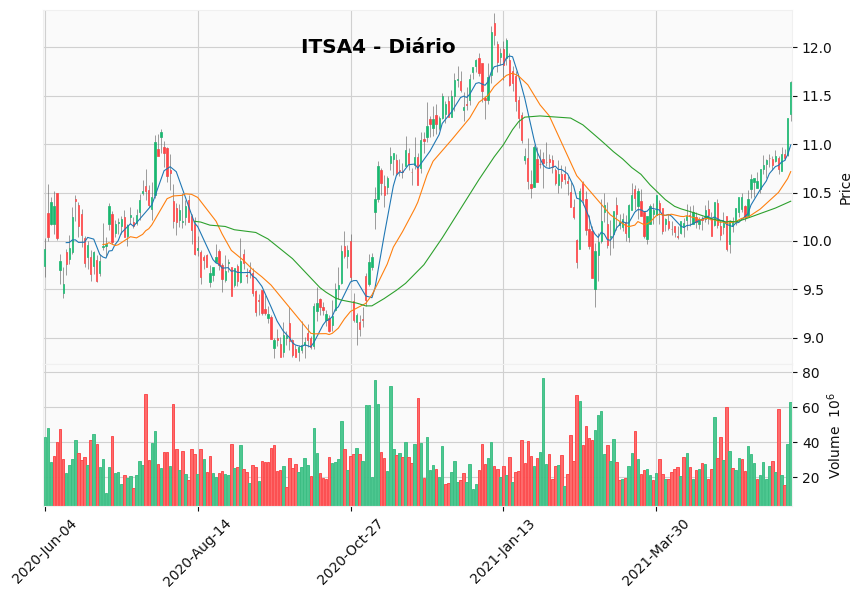

In [13]:
mpf.plot(cotac_diaria, figratio=(15,10),
          type='candle', title=acao + " - Diário ",
          mav=(8, 20, 50), volume=True,
          tight_layout=True,
          style='yahoo')

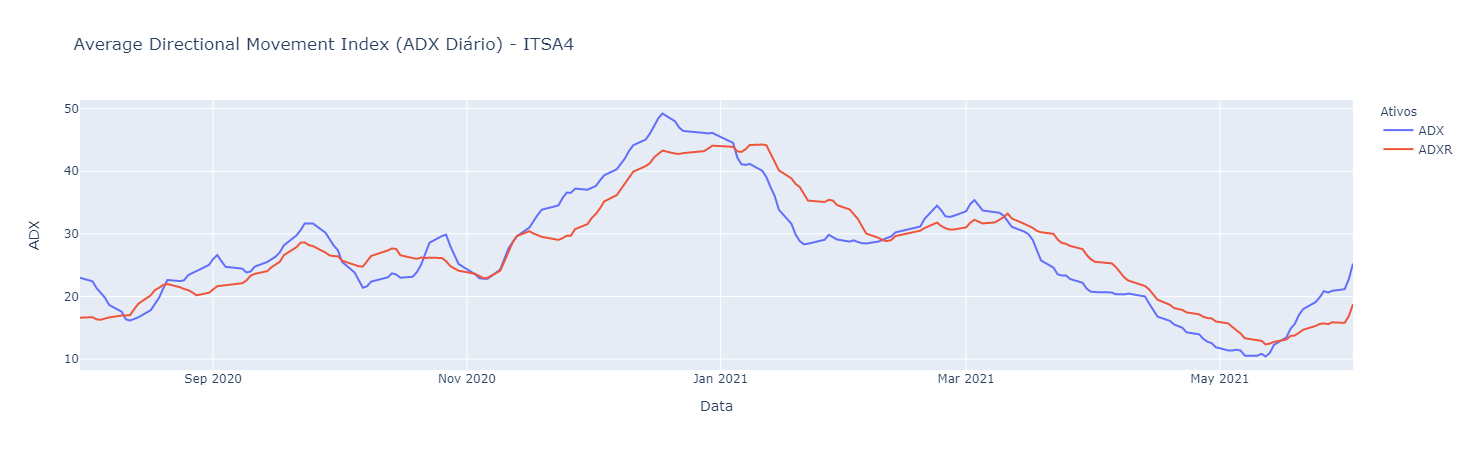

In [14]:
(indic_d).plot(title = 'Average Directional Movement Index (ADX Diário) - ' + acao,
                    labels=dict(Date="Data", value="ADX", variable="Ativos"))

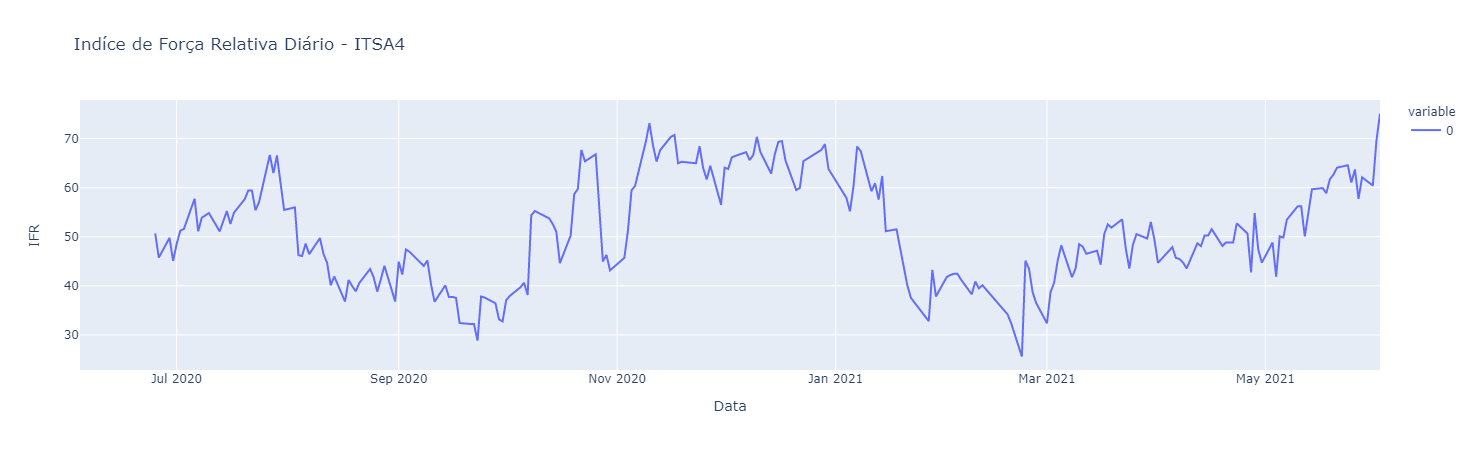

In [15]:
(ind_ifr_d).plot(title = 'Indíce de Força Relativa Diário - ' + acao,
                    labels=dict(Date="Data", value="IFR"))

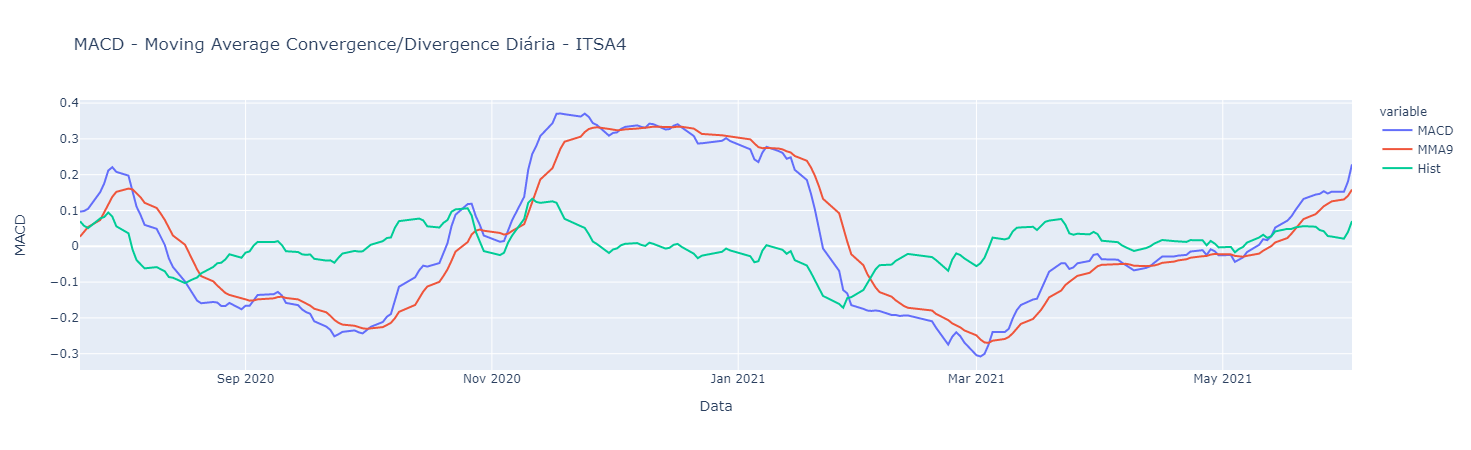

In [16]:
(macd_d).plot(title = 'MACD - Moving Average Convergence/Divergence Diária - ' + acao,
                    labels=dict(Date="Data", value="MACD"))

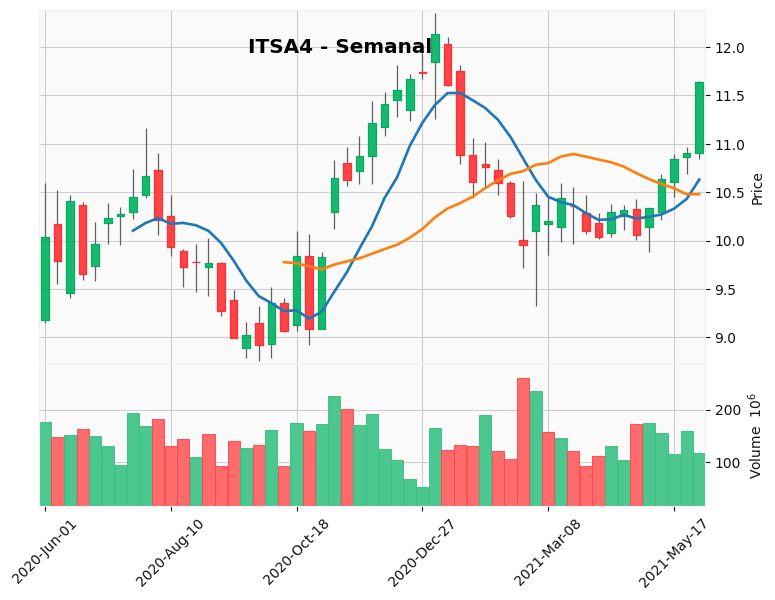

In [17]:
mpf.plot(cotac_seman, figratio=(20,15),
          type='candle', title=acao + ' - Semanal',
          mav=(8, 20), volume=True,
          tight_layout=True,
          style='yahoo')

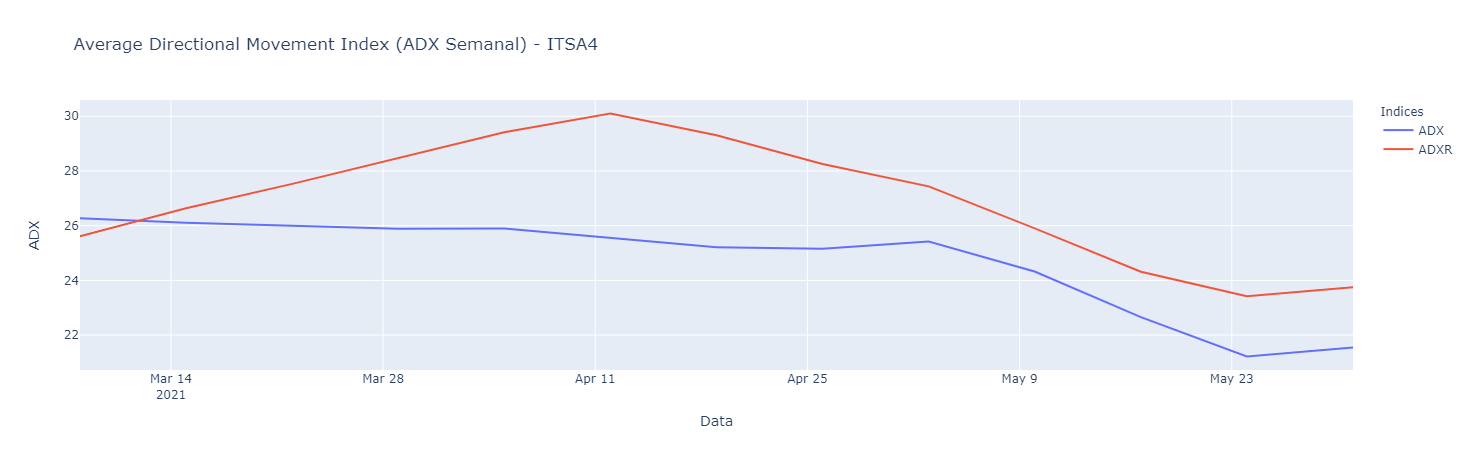

In [18]:
(indic_s).plot(title = 'Average Directional Movement Index (ADX Semanal) - ' + acao,
                    labels=dict(Date="Data", value="ADX", variable="Indices"))

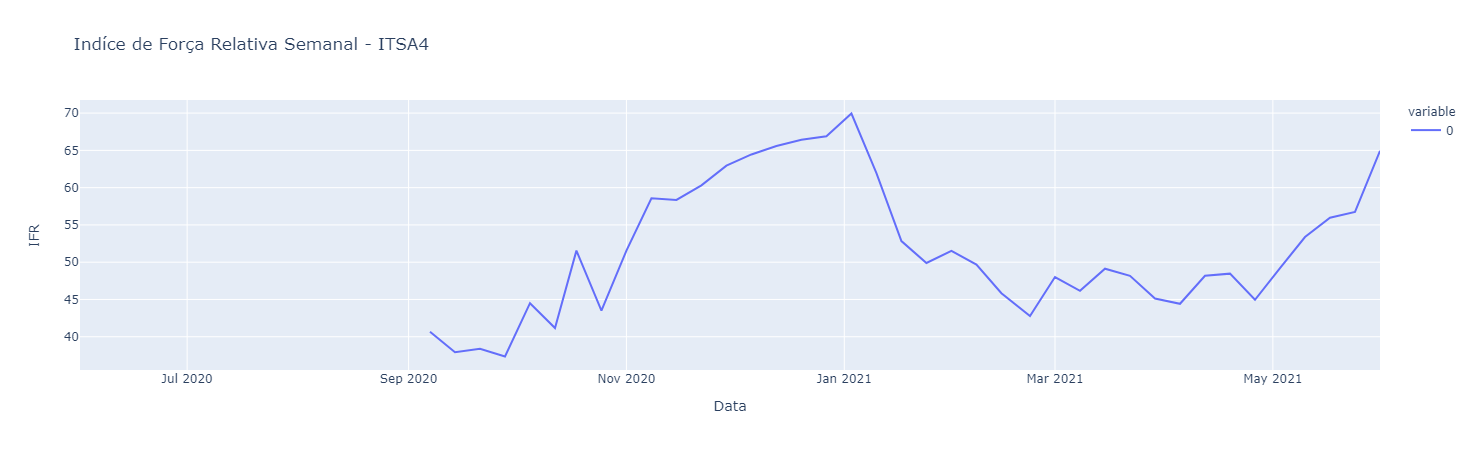

In [19]:
(ind_ifr_s).plot(title = 'Indíce de Força Relativa Semanal - ' + acao,
                    labels=dict(Date="Data", value="IFR"))

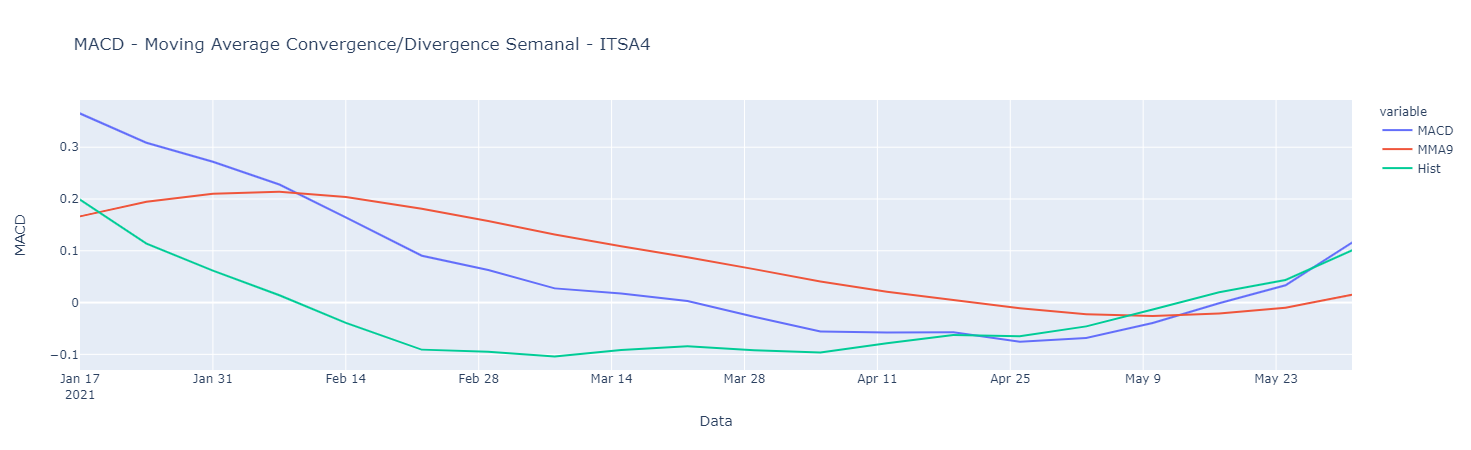

In [20]:
(macd_s).plot(title = 'MACD - Moving Average Convergence/Divergence Semanal - ' + acao,
                    labels=dict(Date="Data", value="MACD"))

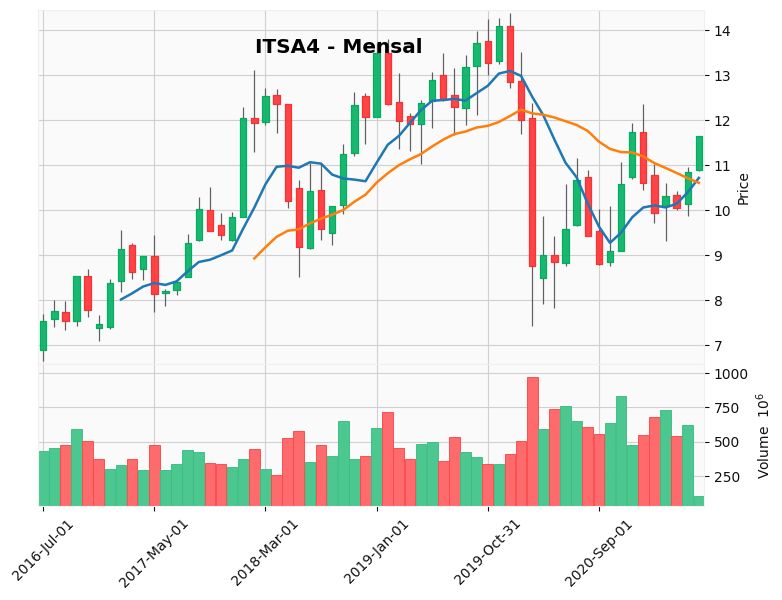

In [21]:
mpf.plot(cotac_mensal, figratio=(20,15),
          type='candle', title=acao + ' - Mensal',
          mav=(8, 20), volume=True,
          tight_layout=True,
          style='yahoo')

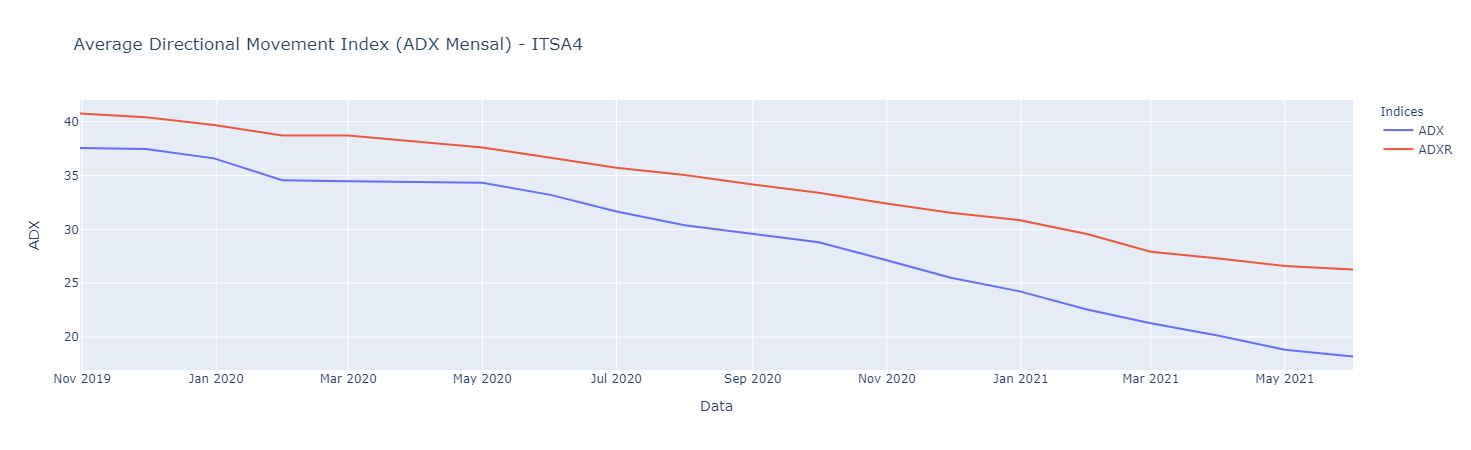

In [22]:
(indic_m).plot(title = 'Average Directional Movement Index (ADX Mensal) - ' + acao,
                    labels=dict(Date="Data", value="ADX", variable="Indices"))

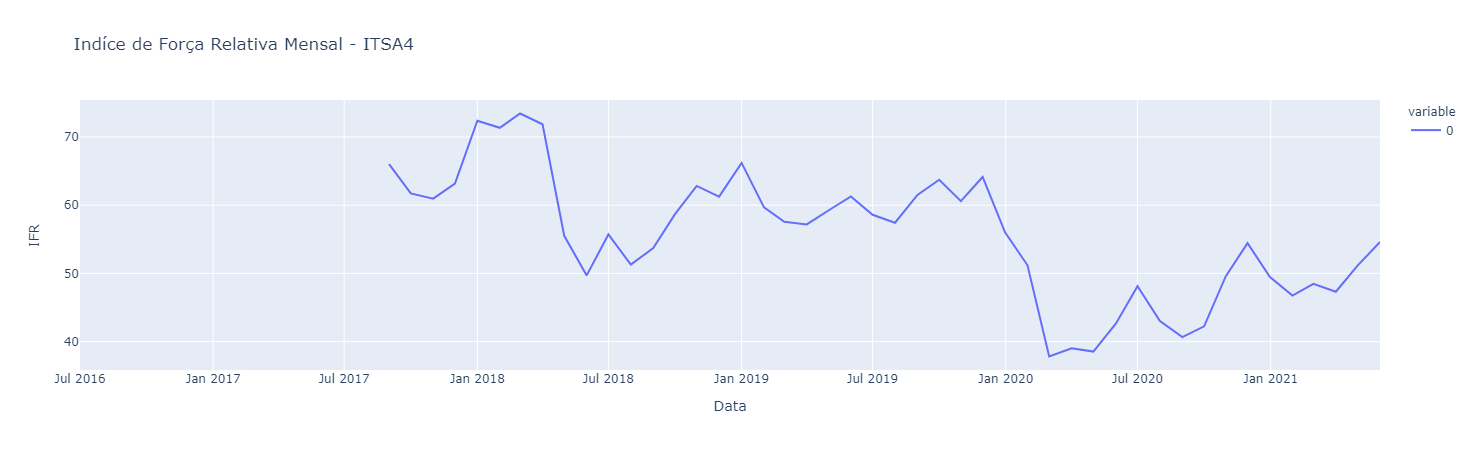

In [23]:
(ind_ifr_m).plot(title = 'Indíce de Força Relativa Mensal - ' + acao,
                    labels=dict(Date="Data", value="IFR"))

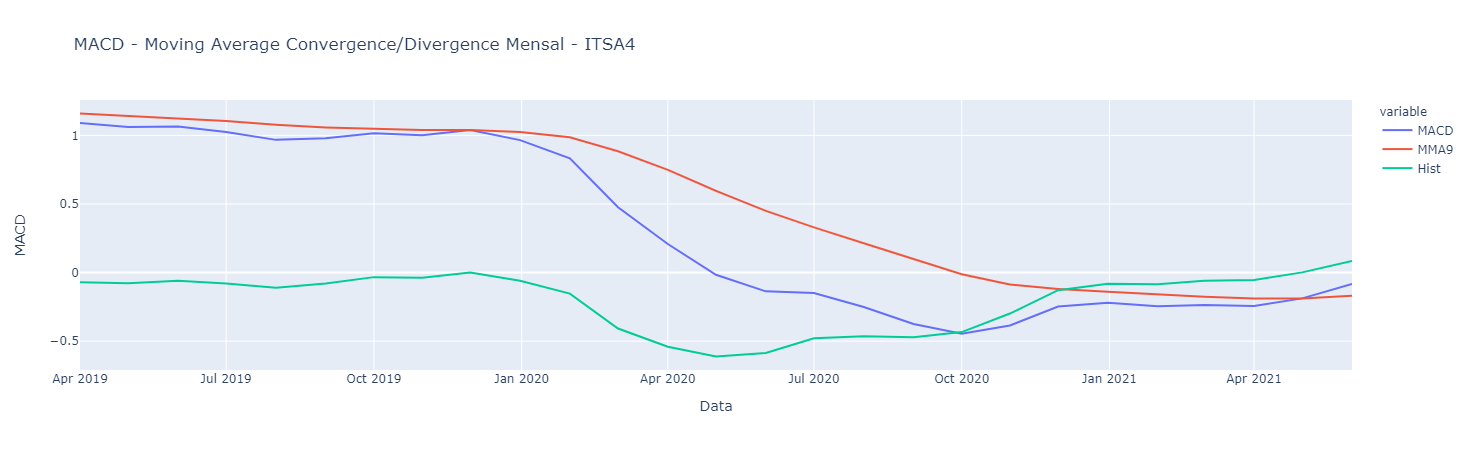

In [24]:
(macd_m).plot(title = 'MACD - Moving Average Convergence/Divergence Mensal - ' + acao,
                    labels=dict(Date="Data", value="MACD"))

In [25]:
pat_doji_d = ta.CDLDOJISTAR(cotac_diaria['Open'], cotac_diaria['High'], cotac_diaria['Low'], cotac_diaria['Close'])
pat_dragdoji_d = ta.CDLDRAGONFLYDOJI(cotac_diaria['Open'], cotac_diaria['High'], cotac_diaria['Low'], cotac_diaria['Close'])
pat_engulf_d = ta.CDLENGULFING(cotac_diaria['Open'], cotac_diaria['High'], cotac_diaria['Low'], cotac_diaria['Close'])
pat_hammer_d = ta.CDLHAMMER(cotac_diaria['Open'], cotac_diaria['High'], cotac_diaria['Low'], cotac_diaria['Close'])
pat_mstar_d = ta.CDLMORNINGSTAR(cotac_diaria['Open'], cotac_diaria['High'], cotac_diaria['Low'], cotac_diaria['Close'])

In [26]:
pat_doji_s = ta.CDLDOJISTAR(cotac_seman['Open'], cotac_seman['High'], cotac_seman['Low'], cotac_seman['Close'])
pat_dragdoji_s = ta.CDLDRAGONFLYDOJI(cotac_seman['Open'], cotac_seman['High'], cotac_seman['Low'], cotac_seman['Close'])
pat_engulf_s = ta.CDLENGULFING(cotac_seman['Open'], cotac_seman['High'], cotac_seman['Low'], cotac_seman['Close'])
pat_hammer_s = ta.CDLHAMMER(cotac_seman['Open'], cotac_seman['High'], cotac_seman['Low'], cotac_seman['Close'])
pat_mstar_s = ta.CDLMORNINGSTAR(cotac_seman['Open'], cotac_seman['High'], cotac_seman['Low'], cotac_seman['Close'])

In [27]:
pat_doji_m = ta.CDLDOJISTAR(cotac_mensal['Open'], cotac_mensal['High'], cotac_mensal['Low'], cotac_mensal['Close'])
pat_dragdoji_m = ta.CDLDRAGONFLYDOJI(cotac_mensal['Open'], cotac_mensal['High'], cotac_mensal['Low'], cotac_mensal['Close'])
pat_engulf_m = ta.CDLENGULFING(cotac_mensal['Open'], cotac_mensal['High'], cotac_mensal['Low'], cotac_mensal['Close'])
pat_hammer_m = ta.CDLHAMMER(cotac_mensal['Open'], cotac_mensal['High'], cotac_mensal['Low'], cotac_mensal['Close'])
pat_mstar_m = ta.CDLMORNINGSTAR(cotac_mensal['Open'], cotac_mensal['High'], cotac_mensal['Low'], cotac_mensal['Close'])

In [28]:
print('Doji:', pat_doji_d[pat_doji_d != 0])
print('Dragon Doji:', pat_dragdoji_d[pat_dragdoji_d != 0])
print('Egulf :',pat_engulf_d[pat_engulf_d != 0])
print('Hammer :', pat_hammer_d[pat_hammer_d != 0])
print('Morning Star:' ,pat_mstar_d[pat_mstar_d != 0])

Doji: Date
2020-07-21   -100
2020-11-26    100
2021-01-05    100
dtype: int32
Dragon Doji: Date
2020-08-18    100
2021-01-05    100
dtype: int32
Egulf : Date
2020-06-10   -100
2020-07-13   -100
2020-08-11   -100
2020-08-25   -100
2020-09-03    100
2020-09-28   -100
2020-10-27   -100
2020-12-14   -100
2020-12-30   -100
2021-01-13   -100
2021-03-17    100
2021-04-08   -100
2021-04-16    100
2021-05-04   -100
2021-05-28    100
dtype: int32
Hammer : Date
2020-09-21    100
2020-10-01    100
2021-01-05    100
dtype: int32
Morning Star: Date
2020-11-27    100
2021-01-06    100
2021-01-28    100
dtype: int32


In [29]:
print('Doji:', pat_doji_s[pat_doji_s != 0])
print('Dragon Doji:', pat_dragdoji_s[pat_dragdoji_s != 0])
print('Egulf :',pat_engulf_s[pat_engulf_s != 0])
print('Hammer :', pat_hammer_s[pat_hammer_s != 0])
print('Morning Star:' ,pat_mstar_s[pat_mstar_s != 0])

Doji: Date
2021-05-24   -100
dtype: int32
Dragon Doji: Series([], dtype: int32)
Egulf : Date
2020-06-15    100
2020-08-03   -100
2021-04-26   -100
dtype: int32
Hammer : Date
2020-08-17    100
dtype: int32
Morning Star: Series([], dtype: int32)


In [30]:
print('Doji:', pat_doji_m[pat_doji_m != 0])
print('Dragon Doji:', pat_dragdoji_m[pat_dragdoji_m != 0])
print('Egulf :',pat_engulf_m[pat_engulf_m != 0])
print('Hammer :', pat_hammer_m[pat_hammer_m != 0])
print('Morning Star:' ,pat_mstar_m[pat_mstar_m != 0])

Doji: Series([], dtype: int32)
Dragon Doji: Date
2017-06-01    100
dtype: int32
Egulf : Date
2017-12-01    100
2019-09-01    100
2020-06-01    100
2020-08-01   -100
2021-04-01   -100
dtype: int32
Hammer : Series([], dtype: int32)
Morning Star: Series([], dtype: int32)
